### Task 1

### Task A

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

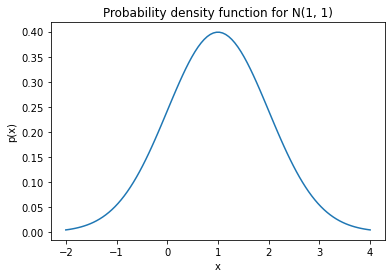

In [2]:
mu = 1
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.title('Probability density function for N(1, 1)')
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

### Task B


In [3]:
print('Probability mass that X is less or equal 0 is', stats.norm(loc = 1 , scale = 1).cdf(0).round(3))

Probability mass that X is less or equal 0 is 0.159


### Task C

$p(x|z)=\frac{p(z|x)p(x)}{p(z)}$

$p(x|z)\propto p(z|x)p(x)$

$p(x|z)\sim N(\frac{z+\sigma^{2}}{1+\sigma^{2}}, \frac{\sigma^{2}}{1+\sigma^{2}})$

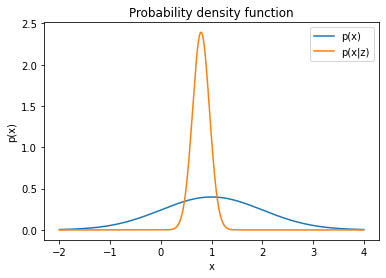

In [4]:
# C
import seaborn as sns
sigma_z = 0.2
z = 0.75
n_samples = 3000

mu_x = 1
sigma_x = 1

mu_z_x = (z+sigma_z)/(1+sigma_z)
sigma_z_x = sigma_z/(1+sigma_z)

x = np.linspace(mu_x - 3*sigma_x, mu_x + 3*sigma_x, n_samples)
plt.title('Probability density function')
plt.plot(x, stats.norm.pdf(x, loc=mu_x, scale=sigma_x), label='p(x)')
plt.plot(x, stats.norm.pdf(x, loc=mu_z_x, scale=sigma_z_x), label='p(x|z)')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

After obtaining observation z our distribution reduce the dispersion and we became more confident.

### Task D

$p(z, x)= p(z|x)p(x)$

In [5]:
def f(x, z):
    p_x = stats.norm.pdf(x, loc=mu_x, scale=sigma_x)
    mu_z_x = (z+sigma_z)/(1+sigma_z)
    sigma_z_x = sigma_z/(1+sigma_z)
    p_z_x = stats.norm.pdf(z, loc=mu_z_x, scale=sigma_z_x)
    return p_x*p_z_x
    
x = np.linspace(mu_x - 3*sigma_x, mu_x + 3*sigma_x, n_samples)
z = np.linspace(mu_x - 3*sigma_x, mu_x + 3*sigma_x, n_samples)
X, Z = np.meshgrid(x,z)
Y = f(X, Z)

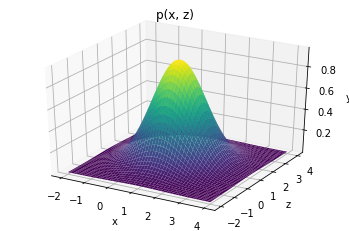

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Z, Y, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('p(x, z)');

### Task 2

### Task A

In [7]:
from scipy.linalg import cholesky 

mu1, mu2, mu3 = np.array([0,0]), np.array([5,0]), np.array([2,2])
cov1, cov2, cov3 = np.array([[1,0],[0,2]]), np.array([[3, -0.4], [-0.4, 2]]), np.array([[9.1, 6],[6, 4]])

In [8]:
def sample_from_circle(radius, num_points):
    xs = np.linspace(-radius, radius, num_points).reshape(num_points,1)
    sign = np.random.choice([-1, 1], (num_points, 1))
    ys =  sign * np.sqrt(radius**2 - xs**2)
    return np.concatenate((xs.reshape(1,num_points), ys.reshape(1,num_points)), axis=0)

In [9]:
cov1

array([[1, 0],
       [0, 2]])

In [10]:
def plot2dcov(mean, covariance,  k=[1], num_points=30, color=['r']):
    '''
    Input: 
    k - list of iso-contour values;
    num_points - number of points to be used to plot iso-contour;
    --------------------------------
    Output:
    Plot k iso-contour;
    '''
    fig = plt.figure()
    fig.set_size_inches(6, 10)
    ax = fig.add_subplot(111)
    plt.title('Iso-contours for N({}, {})'.format(mean, covariance))
    for i in range(len(k)):
        A = cholesky(covariance).T
        points = sample_from_circle(k[i], num_points)
        new_points = mean.reshape(2, 1)+A @ points
        x, y = new_points[0, :], new_points[1, :] 
        ax.plot(x, y, 'o', color=color[i], label=r'{} - sigma iso-contour'.format(k[i]))
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend(loc='upper right')
        ax.set_aspect('equal')
    plt.show()

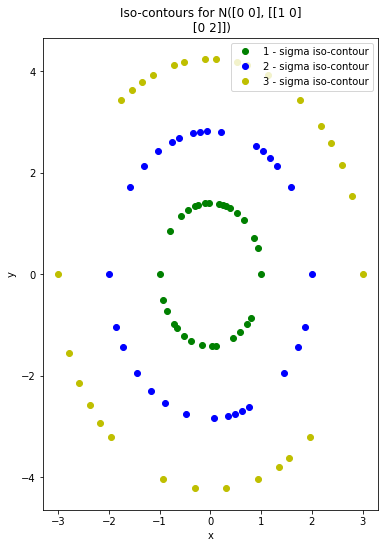

In [11]:
plot2dcov(mu1, cov1, k=[1, 2, 3], num_points=30, color=['g', 'b', 'y'])

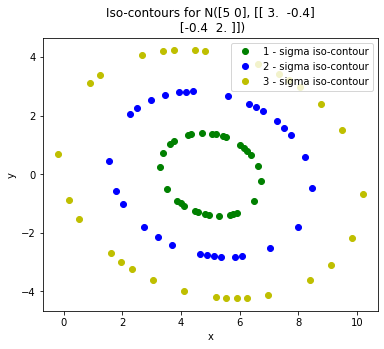

In [12]:
plot2dcov(mu2, cov2, k=[1, 2, 3], num_points=30, color=['g', 'b', 'y'])

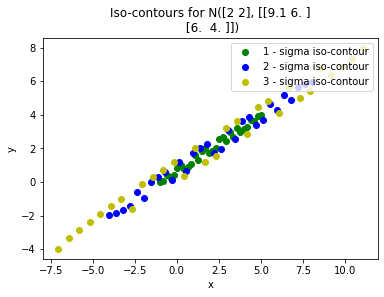

In [13]:
plot2dcov(mu3, cov3, k=[1, 2, 3], num_points=30, color=['g', 'b', 'y'])


The difference between diagonal elements in covariation matrix results in more ellipsoidal shape for the iso-contour and increasing the correlation between x and y - in more rotation.

### Task B 

$\{\vec{x_{i}}\}$ - set of N points;

$\vec{m}_{x} = \frac{1}{N} \sum_{i=1}^{N}{\vec{x_{i}}}$ -sample mean;

$\Sigma_{x} = \frac{1}{N-1} \sum_{i=1}^{N}{(\vec{x_{i}}-\vec{m}_{x})(\vec{x_{i}}-\vec{m}_{x})^{T}} = \frac{1}{N-1} \sum_{i=1}^{N}{(\vec{x_{i}}\vec{x_{i}}^{T}-2\vec{m}_{x}\vec{x_{i}}^{T} - \vec{m}_{x}\vec{m}_{x}^{T})} $ - sample covariance;

### Task C

In [14]:
# C
def y_samples(mean, var, n_samples=200):
    samples = []
    x = np.array(np.random.randn(2, n_samples))
    # Sigma=AA^T
    A = cholesky(var).T
    y_sample = A@x + mean.reshape(2, 1)
    return y_sample

In [16]:
def plot_2D_isocontour(mu_list, cov_list, num_points=2000, num_samples=500, show_samples=[False], add_text=False, text = ['iso-contour']):
    fig = plt.figure()
    fig.set_size_inches(15, 20)
    ax = fig.add_subplot(111)
    for i in range(len(mu_list)):
        A = cholesky(cov_list[i]).T
        points = sample_from_circle(1, num_points)
        new_points = mu_list[i].reshape(2, 1)+A@points
        x, y = new_points[0, :], new_points[1, :] 
        if show_samples[i]:
            samples = y_samples(mu_list[i], cov_list[i], num_samples)
            ax.plot(samples[0], samples[1], 'o', label = 'samples')
        if add_text:
            ax.plot(x, y, 'o', label= text[i])
        else:
            ax.plot(x, y, 'o', label= 'time index t = {}'.format(i))
        plt.title('1-sigma iso-contour'.format(i))
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.legend(loc='upper right')
        ax.set_aspect('equal')
    plt.show()

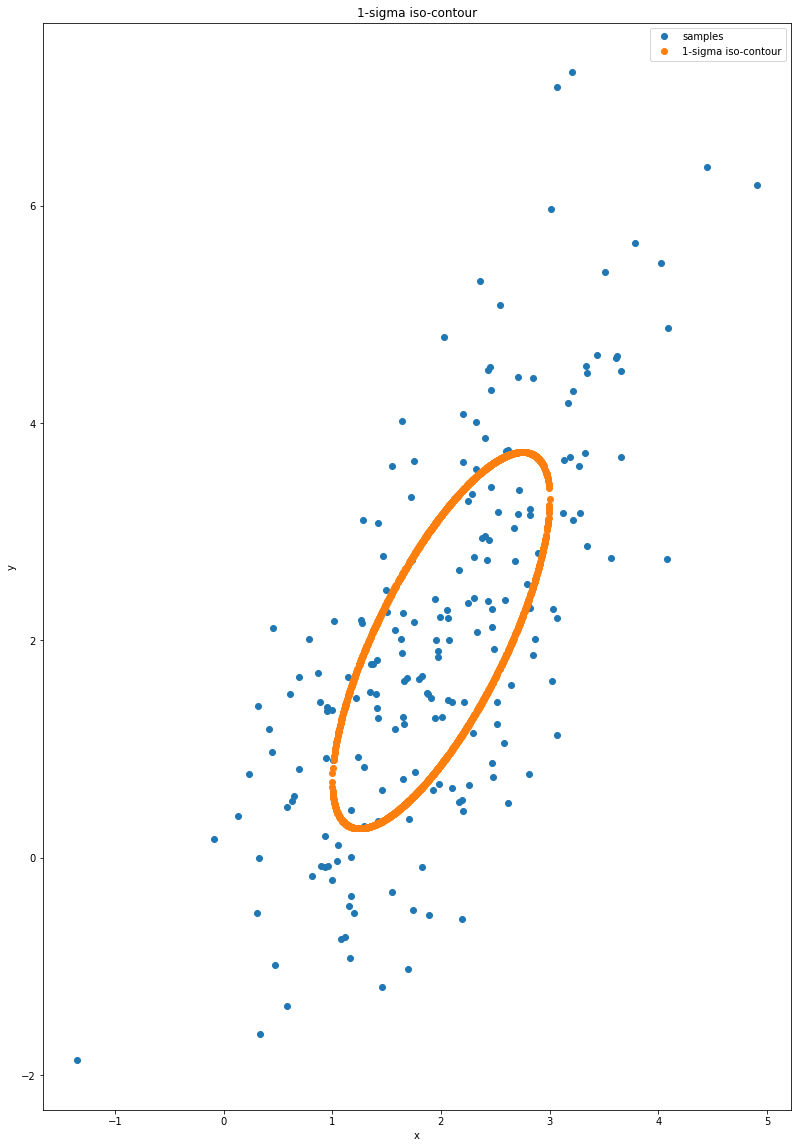

In [17]:
mu = np.array([2,2])
cov = np.array([[1,1.3],[1.3,3]])
n = 200
plot_2D_isocontour([mu], [cov], num_samples=n, show_samples=[True], add_text=True, text=['1-sigma iso-contour'])

In [18]:
def sample_mean(dat):
    s_mean = dat.sum(axis=1)/dat.shape[1]
    return s_mean

def sample_covariance(dat):
    dim, num_samples = dat.shape[0], dat.shape[1]
    mean = sample_mean(dat)
    cov_array = []
    for i in range(num_samples):
        cov_ = (dat[:, i]-mean).reshape(dim, 1)@(dat[:, i]-mean).reshape(dim,1).T
        cov_array.append(cov_)
    s_cov = 1/(num_samples-1)*np.sum(np.array(cov_array), axis=0)
    return s_cov

Obtained sample mean is [1.87383564 1.92212978] and sample covariance is [[1.65785469 1.35932412]
 [1.35932412 2.27919515]] for number of samples equal to 10
Mean is [2 2] and covariance is [[1.  1.3]
 [1.3 3. ]]


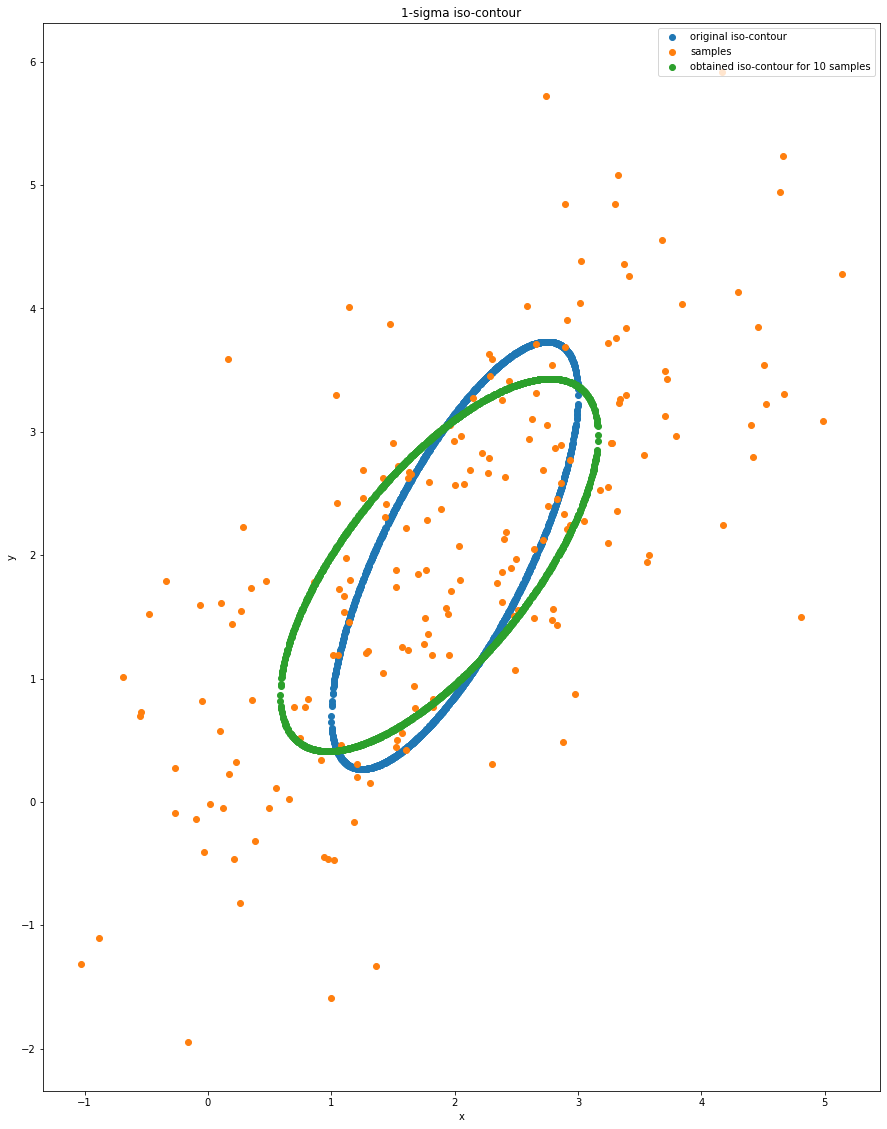

Obtained sample mean is [2.01624463 1.98760468] and sample covariance is [[1.08858362 1.42095101]
 [1.42095101 3.18569264]] for number of samples equal to 1000
Mean is [2 2] and covariance is [[1.  1.3]
 [1.3 3. ]]


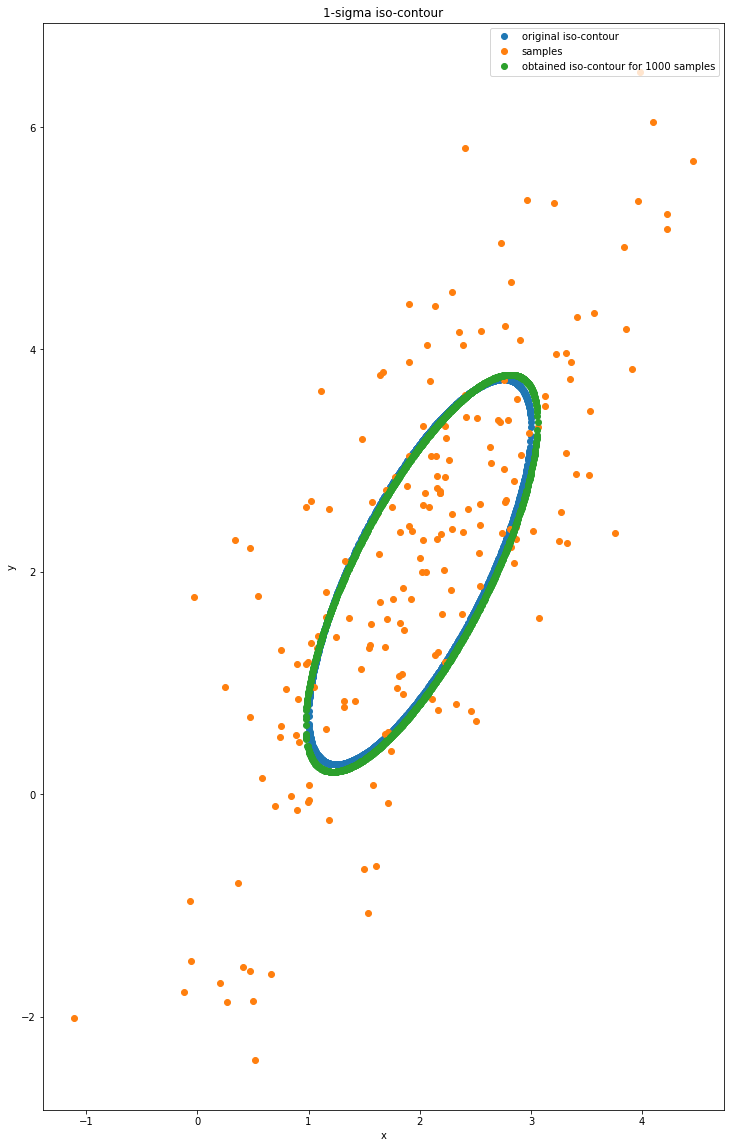

Obtained sample mean is [2.03973999 2.05553723] and sample covariance is [[1.02491775 1.37966217]
 [1.37966217 3.19416948]] for number of samples equal to 2000
Mean is [2 2] and covariance is [[1.  1.3]
 [1.3 3. ]]


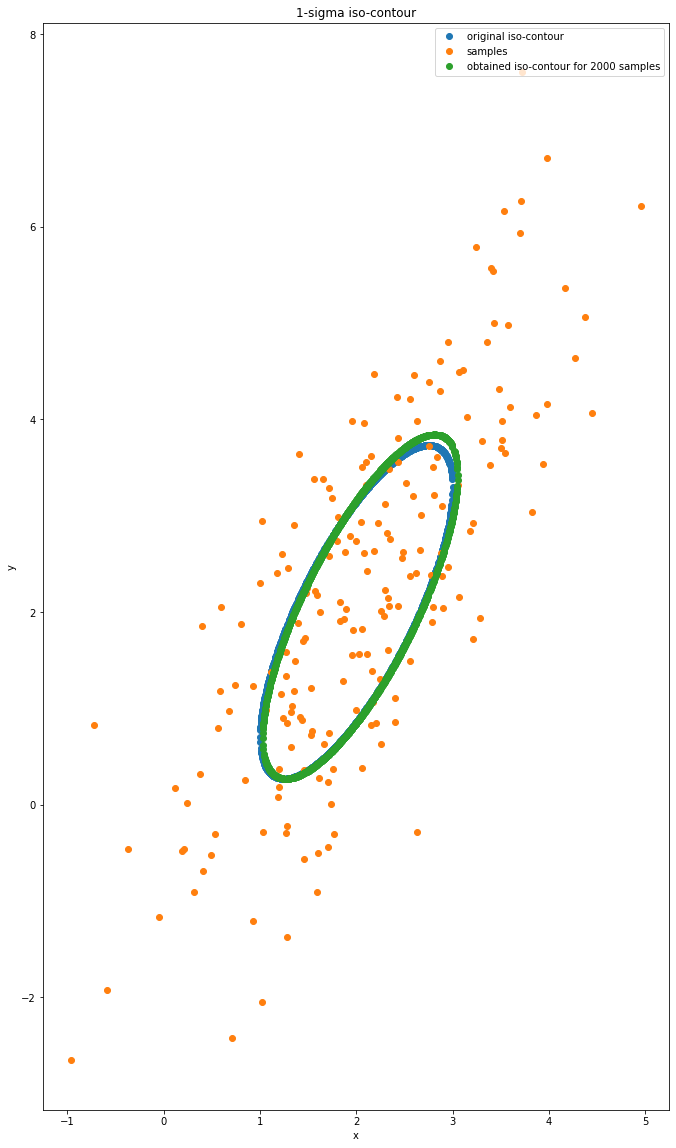

Obtained sample mean is [1.98442801 1.98865591] and sample covariance is [[0.97880488 1.2590603 ]
 [1.2590603  2.91254486]] for number of samples equal to 5000
Mean is [2 2] and covariance is [[1.  1.3]
 [1.3 3. ]]


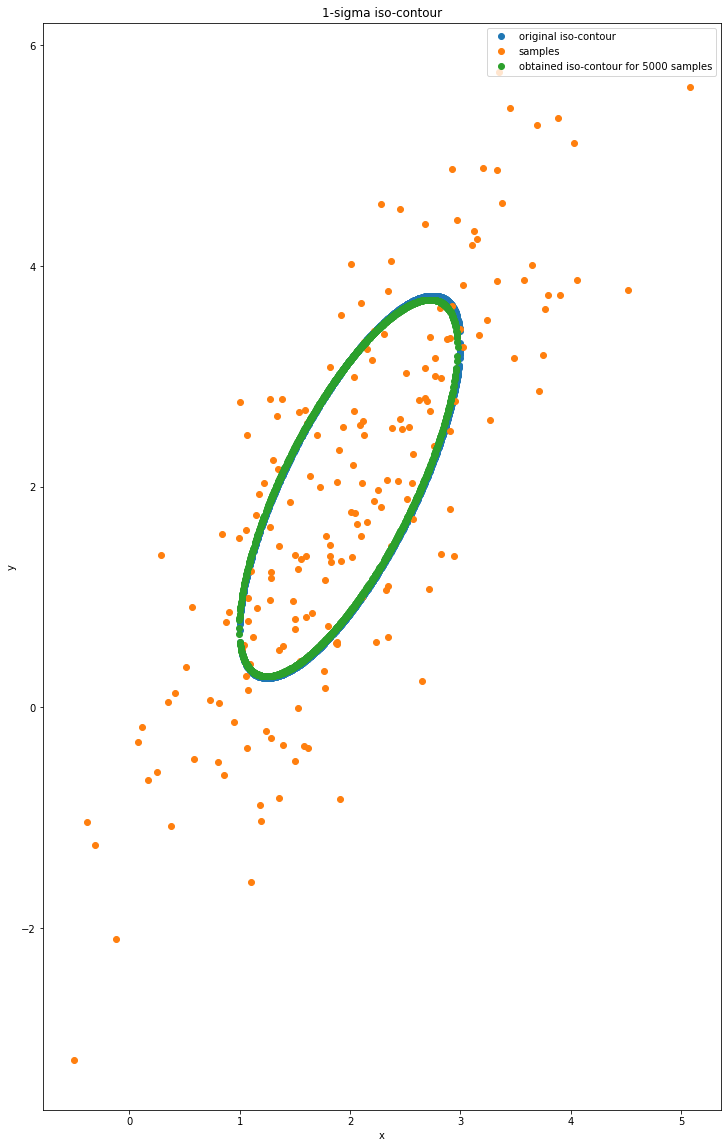

Obtained sample mean is [2.00345574 2.01168232] and sample covariance is [[0.99515086 1.2786745 ]
 [1.2786745  2.96143988]] for number of samples equal to 10000
Mean is [2 2] and covariance is [[1.  1.3]
 [1.3 3. ]]


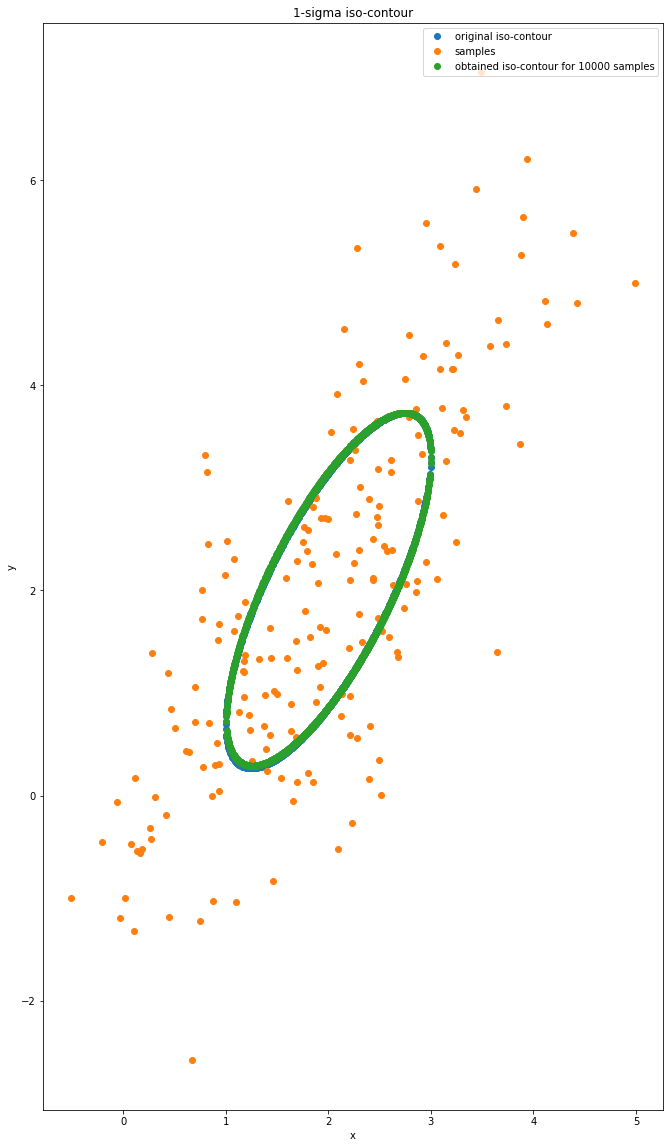

Obtained sample mean is [1.99874283 1.99275907] and sample covariance is [[1.00457083 1.3025658 ]
 [1.3025658  3.00293427]] for number of samples equal to 100000
Mean is [2 2] and covariance is [[1.  1.3]
 [1.3 3. ]]


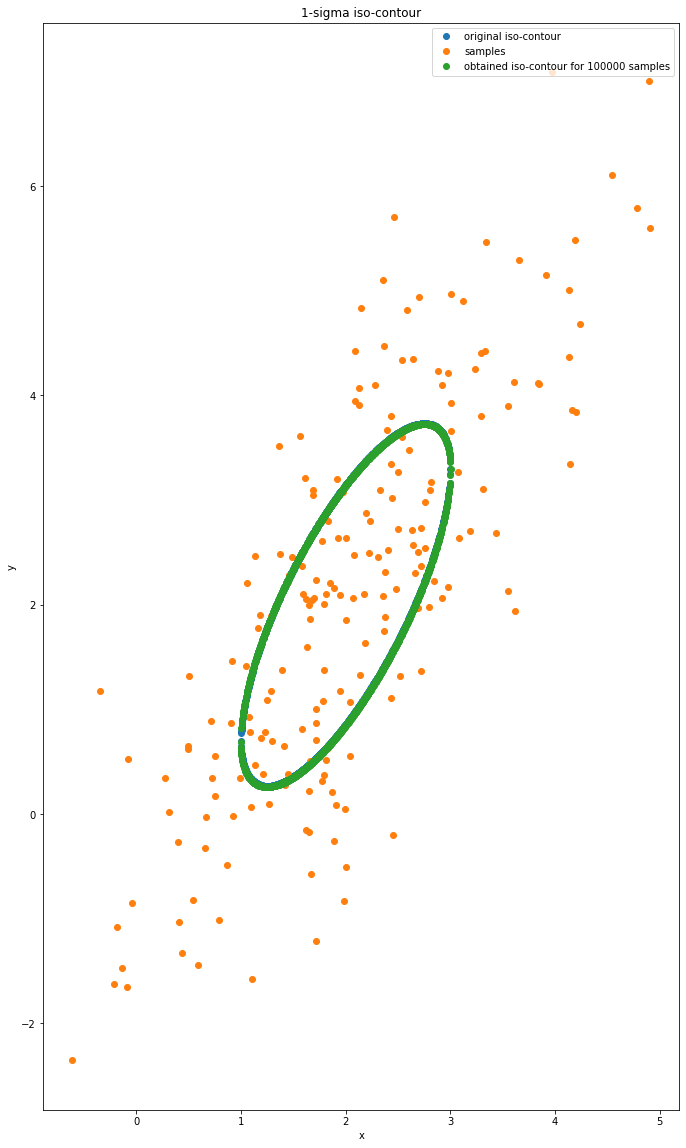

In [19]:
n_samples = [10, 1000, 2000, 5000,  10000, 100000]
for i in n_samples:
    samples = y_samples(mu, cov, i)
    mu_ = sample_mean(samples)
    cov_ = sample_covariance(samples)
    print('Obtained sample mean is {} and sample covariance is {} for number of samples equal to {}'.format(mu_, cov_, i))
    print('Mean is {} and covariance is {}'.format(mu, cov))
    plot_2D_isocontour([mu, mu_], [cov, cov_], num_samples=n, show_samples=[False, True], add_text=True, text=['original iso-contour', 'obtained iso-contour for {} samples'.format(i)])

Sample mean and covariance tend to mean and covariance with increasing the number of samples. 

From this figures we could see that for number of samples equal to 5000 our original iso-contour almost coincides with obtained.

## Task3

### Task A


$\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t} $= $I\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t-1}
 $ + $I\Delta t \begin{equation*}
\begin{bmatrix}
v_{x} \\
v_{y}
\end{bmatrix}
\end{equation*}_{t}$+ $\begin{equation*}
\begin{bmatrix}
\eta_{x} \\
\eta_{y}
\end{bmatrix}
\end{equation*}_{t}$ (1)


$\mathbb{E}\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t} $= $I\mathbb{E}\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t-1}
 $ + $I\Delta t \begin{equation*}
\begin{bmatrix}
v_{x} \\
v_{y}
\end{bmatrix}
\end{equation*}_{t}$ (2)


$\mathbb{D}\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t} $= $\mathbb{E}\{(\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t}
 $ - $\mathbb{E}\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t})$
$(\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t}
 $ - $\mathbb{E}\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t})^{T}\}$

Expand (1) and (2) and as  $\mathbb{E}\{\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t-1}$ $\begin{equation*}
\begin{bmatrix}
\eta_{x} \\
\eta_{y}
\end{bmatrix}
\end{equation*}_{t}\}=0$, then obtain the following:

$\mathbb{D}\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t} $= $\mathbb{D}\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t-1} $+ $\mathbb{D}\begin{equation*}
\begin{bmatrix}
\eta_{x} \\
\eta_{y}
\end{bmatrix}
\end{equation*}_{t}$ = $\mathbb{D}\begin{equation*}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}_{t-1} $+ $0.1I$

### Task B

In [20]:
# B
mu_state_0 = np.array([0, 0])
cov_state_0 = np.array([[0.1, 0], [0, 0.1]])

delta_t = 0.5

t = [0, 1, 2, 3, 4, 5]
u_t = np.array([3, 0])

print(cov_state_0.shape)

mu_list = []
cov_list = []


for time in t:
    if time == 0:
        mu_list.append(mu_state_0)
        cov_list.append(cov_state_0)
    else:
        new_mu = np.eye(2) @ mu_list[time-1] + np.eye(2)* delta_t @ u_t 
        new_cov = np.eye(2) @ cov_list[time-1] + np.eye(2)*0.1
        mu_list.append(new_mu)
        cov_list.append(new_cov)

(2, 2)


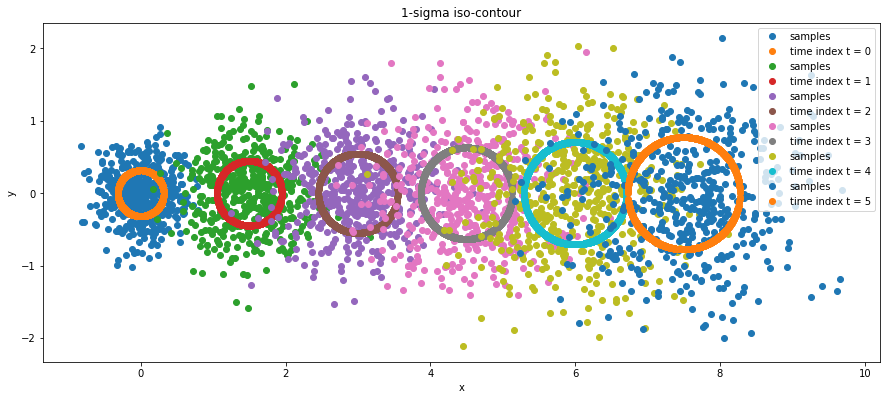

In [21]:
plot_2D_isocontour(mu_list, cov_list, show_samples=[True]*len(mu_list))

### Task C

In [22]:
mu_list = []
cov_list = []

A = np.array([[1., 0.3], [0., 1.]])

for time in t:
    if time == 0:
        mu_list.append(mu_state_0)
        cov_list.append(cov_state_0)
    else:
        new_mu = A @ mu_list[time-1] + np.eye(2)* delta_t @ u_t 
        new_cov = A @ cov_list[time-1] + np.eye(2)*0.1
        mu_list.append(new_mu)
        cov_list.append(new_cov)

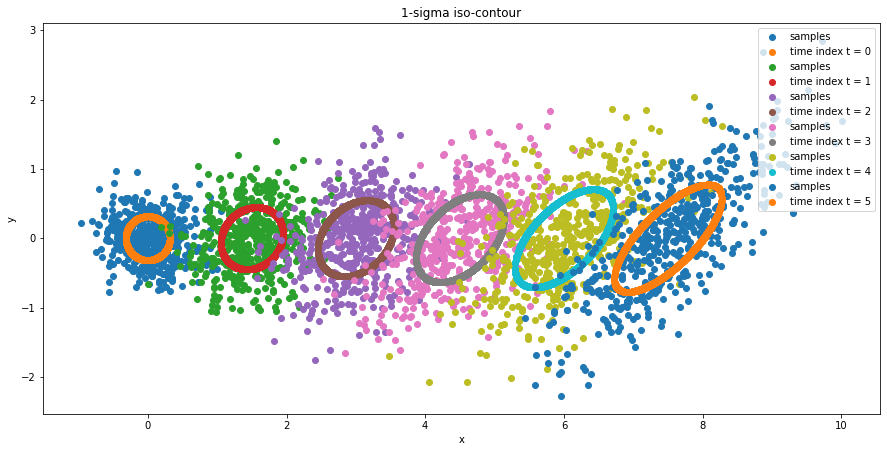

In [23]:
plot_2D_isocontour(mu_list, cov_list, num_samples=500, show_samples=[True]*len(mu_list))

### Task D


$x_{t-1}\sim N(\mu_{t-1}, \Sigma_{t-1}),$

$\varepsilon \sim N(0, R)$


$x_{t}\sim N(g(\mu_{t-1}, u_{t}), G_{t}\Sigma_{t-1}G_{t}^{T}+R)$

In [24]:
# D
mu_state_0D = np.array([0, 0, 0])
cov_state_0D = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])

mu_eps_0D = np.array([0, 0, 0])
cov_eps_0D = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]])

delta_t = 0.5

t = list(range(0, 6, 1))
u_t_D = np.array([3, 1.5])



mu_list_D = []
cov_list_D = []

def linearize_matrix(theta_0, delta_t, u_t_D):
    lin_matrix = np.array([[1, 0, -np.sin(theta_0)*delta_t*u_t_D[0]],
                           [0, 1, np.cos(theta_0)*delta_t*u_t_D[0]],
                           [0, 0, 1]])
    return lin_matrix

for time in t:   
    if time == 0:
        mu_list_D.append(mu_state_0D)
        cov_list_D.append(cov_state_0D)
    else:
        lin_matrix = linearize_matrix(mu_list_D[time-1][2], delta_t, u_t_D)
        g_u = np.array([np.cos(mu_list_D[time-1][2])*delta_t*u_t_D[0], 
                      np.sin(mu_list_D[time-1][2])*delta_t*u_t_D[0], 
                      delta_t*u_t_D[1]])
        new_mu = mu_list_D[time-1]+ g_u
        new_cov = cov_eps_0D  + lin_matrix @ cov_list_D[time-1] @ lin_matrix.T
        mu_list_D.append(new_mu)
        cov_list_D.append(new_cov)

In [25]:
def marginalize(mu, cov):
    mu_list = [np.array(mu)[i][:2] for i in range(np.array(mu).shape[0])]
    cov_list = [np.array(cov)[i][:2, :2] for i in range(np.array(cov).shape[0])]
    return mu_list, cov_list

In [26]:
mu, cov = marginalize( mu_list_D, cov_list_D)

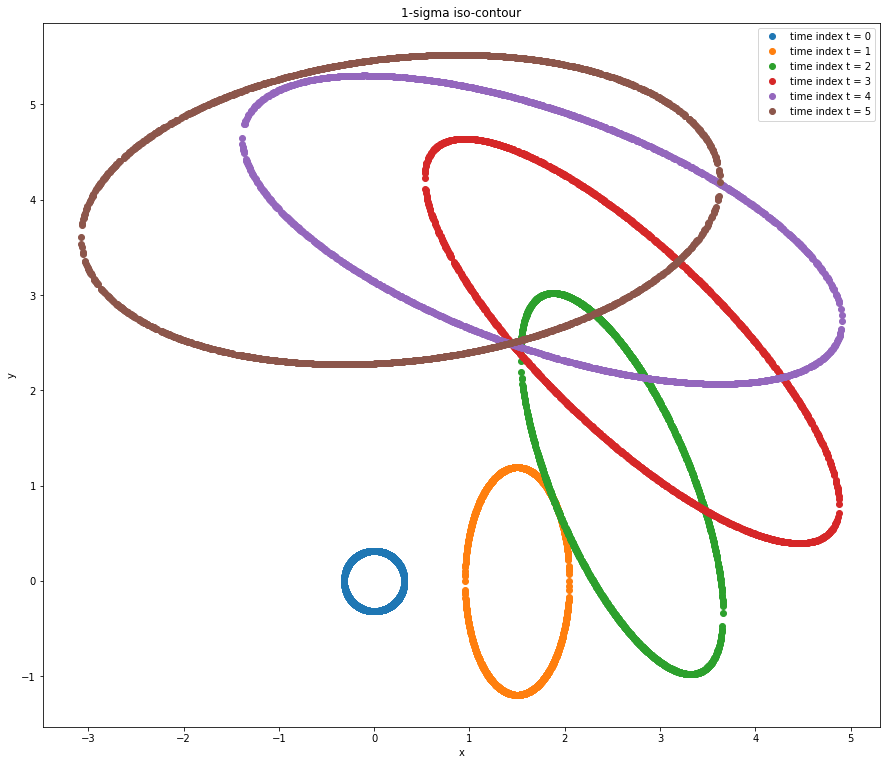

In [28]:
plot_2D_isocontour(mu, cov, show_samples=[False]*len(mu))

## Task E

$x_{t-1}\sim N(\mu_{t-1}, \Sigma_{t-1}),$

$\varepsilon \sim N(0, R)$


$x_{t}\sim N(g(\mu_{t-1}, u_{t}), G_{t}\Sigma_{t-1}G_{t}^{T}+V_{t}RV_{t}^{T})$

In [29]:
# E
mu_eps_0E = np.array([0, 0])
cov_eps_0E = np.array([[2, 0], [0, 0.1]])

delta_t = 0.5

t = list(range(0, 6, 1))
u_t_D = np.array([3, 1.5])

mu_list_E = []
cov_list_E = []

for time in t:   
    if time == 0:
        mu_list_E.append(mu_state_0D)
        cov_list_E.append(cov_state_0D)
    else:
        lin_matrix= linearize_matrix(mu_list_E[time-1][2], delta_t, u_t_D)
        g_u = np.array([np.cos(mu_list_E[time-1][2])*delta_t*u_t_D[0], 
                      np.sin(mu_list_E[time-1][2])*delta_t*u_t_D[0], 
                      delta_t*u_t_D[1]])
        V = np.array([[np.cos(mu_list_E[time-1][2])*delta_t, 0],
                      [np.sin(mu_list_E[time-1][2])*delta_t, 0],
                      [0, delta_t*u_t_D[1]]])
        
        new_mu = mu_list_E[time-1]+ g_u
        new_cov = V @ cov_eps_0E @ V.T + lin_matrix @ cov_list_E[time-1] @ lin_matrix.T
        
        mu_list_E.append(new_mu)
        cov_list_E.append(new_cov)

In [30]:
mu, cov = marginalize( mu_list_E, cov_list_E)

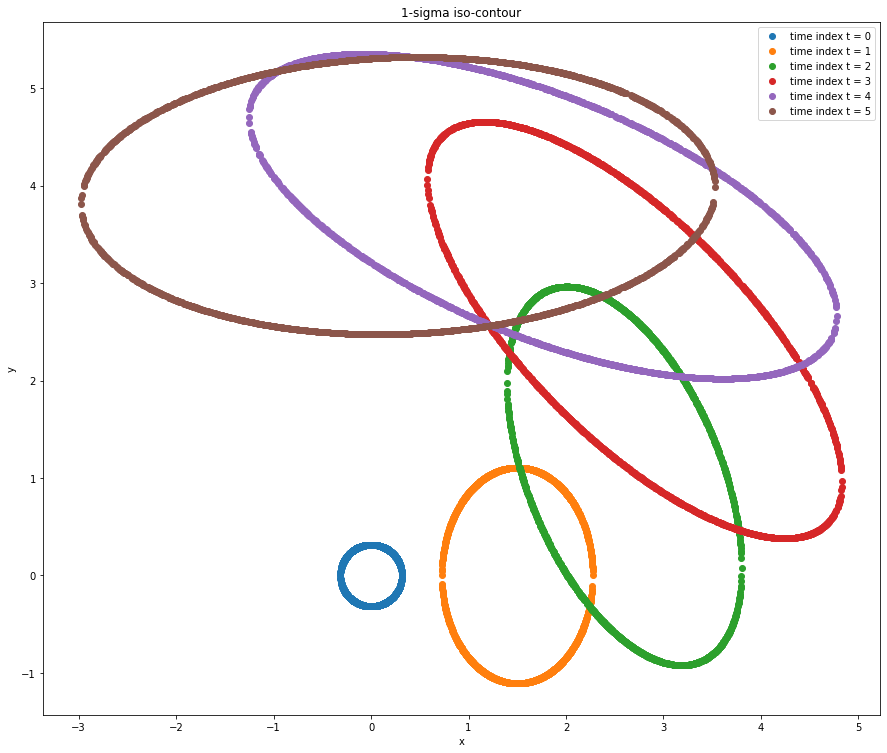

In [31]:
plot_2D_isocontour(mu, cov, show_samples=[False]*len(mu))

Adding noise not only to states, but also to actions increase the covariance of states. 

The main difference is, that  instead of mistake's covariance $R$ now we add $V_{t}RV_{t}^{T}$.